In [238]:
import math
import nltk
from nltk import word_tokenize,sent_tokenize
import matplotlib.pyplot as plt 
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/rajarshidas/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

# PREPROCESSING

In [211]:
text=""
for i in range (1,7):
    filename='Harry_Potter_Text/'+'Book'+str(i)+'.txt'
    with open(filename) as f:
        Lines = f.readlines()
        # book=""
        for lin in Lines:
            if not (len(lin)>5 and lin[:6]=='Page |'):
                if lin != 'Harry Potter and the Goblet of Fire - J.K. Rowling \n':
                    text+=lin.lower()
x=sent_tokenize(text)
sentences=[]
sentencewise_tokens=[]
for l in x:
    li=''.join(l.splitlines())
    sentences.append(li)
    sentencewise_tokens.append(word_tokenize(li))
tokens=word_tokenize(text)



In [214]:
print(len(sentences))
print(len(tokens))

51670
1155432


In [215]:
final_tokens=[]
for token in tokens:
    if not (len(token)==1 and not token.isalnum()):
        final_tokens.append(token.strip('.'))
tokens=final_tokens
#REMOVE PUNCTUATION

In [216]:
len(tokens)

920732

In [217]:
vocab=list(set(tokens))

In [218]:
print(len(vocab))

21079


In [219]:
train_book=' '.join(tokens)

# N-GRAM MODEL

In [231]:
#value of m in problem statement/ range of n in n-gram
n_limit=5

In [232]:
ngrams=[]
for i in range (n_limit):
    d={}
    ngrams.append(d)
for n in range (1,n_limit+1):
    for i in range(len(tokens)):
        if i+n>len(tokens):
            break
        lis=[]
        for j in range(i,i+n):
            lis.append(tokens[j])
        lis=tuple(lis)
        if lis not in ngrams[n-1]:
            ngrams[n-1][lis] = 1
        else : 
            ngrams[n-1][lis] += 1
    ngrams[n-1]=dict(sorted(ngrams[n-1].items(), key=lambda item: -item[1]))
    print(n,len(ngrams[n-1]))




1 21079
2 277884
3 642415
4 835723
5 896438


# SENTENCE GENERATION

In [127]:
def get_n(n,a,line,word_limit):
    if word_limit==0:
        print(line)
        return line
    sz=len(a)
    if sz==0 or n==1:
        word=next(iter(ngrams[0]))[0]#first key
        a.append(word)
        line=line+' '+word
        # print(line)
        get_n(n,a,line,word_limit-1)
    elif sz<n-1:
        found = False
        for key in ngrams[sz]:
            lis=list(key)
            last_word=lis[-1]
            lis=lis[:-1]
            if lis==a:
                line=line+' '+last_word
                # a=a[1:]
                a.append(last_word)
                found=True
                break
        if found :
            # print(line)
            get_n(n,a,line,word_limit-1)
        else : 
            print('Cant find')
    elif sz==n-1:
        found = False
        for key in ngrams[n-1]:
            lis=list(key)
            last_word=lis[-1]
            lis=lis[:-1]
            if lis==a:
                line=line+' '+last_word
                a=a[1:]
                a.append(last_word)
                found=True
                break
        if found :
            # print(line)
            get_n(n,a,line,word_limit-1)
        else : 
            print('Cant find')
        




In [128]:
def generate_sentence(n,word_limit):
    prev_tokens=[]
    sentence=""
    line=get_n(n,prev_tokens,sentence,word_limit)  


In [129]:
generate_sentence(5,10)

 the door and turned the key fumbling in their panic


In [130]:
generate_sentence(5,100)

 the door and turned the key fumbling in their panic harry pulled the door open and they ran inside hermione granger was shrinking against the wall opposite looking as if she was about to faint the troll was advancing on her knocking the sinks off the walls as it went confuse it harry said desperately to ron and seizing a tap he threw it as hard as he could into the kitchen harry hurried into the living room in time to catch the last report on the evening news and finally bird-watchers everywhere have reported that the nation s owls


# DEV SET

In [223]:
text=""
filename='Harry_Potter_Text/'+'Book7.txt'
with open(filename) as f:
    Lines = f.readlines()
    # book=""
    for lin in Lines:
        if not (len(lin)>5 and lin[:6]=='Page |'):
            if lin != 'Harry Potter and the Goblet of Fire - J.K. Rowling \n':
                text+=lin.lower()
x=sent_tokenize(text)
test_sentences=[]
test_sentencewise_tokens=[]
for l in x:
    li=''.join(l.splitlines())
    test_sentences.append(li)
    test_sentencewise_tokens.append(word_tokenize(li))
test_tokens=word_tokenize(text)



In [225]:
print(len(test_sentences))
print(len(test_tokens))

11138
256058


In [226]:
test_final_tokens=[]
for token in test_tokens:
    if not (len(token)==1 and not token.isalnum()):
        test_final_tokens.append(token.strip('.'))
test_tokens=test_final_tokens
#REMOVE PUNCTUATION

In [227]:
len(test_tokens)

204766

In [228]:
test_vocab=set(test_tokens)

In [229]:
len(test_vocab)

11449

In [138]:
vocab=set(vocab)

In [139]:
#OOV words
unknum=len(test_vocab.difference(vocab))
print(unknum)

2068


In [230]:
test_book=' '.join(test_tokens)

# PERPLEXITY

In [141]:
generate_sentence(2,10)

 the door and the door and the door and the


In [142]:
len(vocab)

21079

In [143]:
def log_perp(n,s):
    words=s.split()
    sum=0
    for i in range(len(words)):
        lis=[]
        for j in range(i,i-n,-1):
            if j>=0:
                lis.append(words[j])
        lis.reverse()
        sz=len(lis)
        if sz==1:
            tup=tuple(lis)
            ratio=ngrams[0][tup]/len(tokens)
            sum+=math.log2(ratio)
        else:
            tup1=tuple(lis)
            lis=lis[:-1]
            tup2=tuple(lis)
            ratio=ngrams[sz-1][tup1]/ngrams[sz-2][tup2]
            sum+=math.log2(ratio)
    return sum*(-1/len(words))

In [144]:
s='the door and the door and the door and the'
print(log_perp(2,s))


4.579554625674844


# SMOOTHING

### ADD-1 

In [233]:
def log_perp1(n,s):
    words=s.split()
    sum=0
    for i in range(len(words)):
        lis=[]
        for j in range(i,i-n,-1):
            if j>=0:
                lis.append(words[j])
        lis.reverse()
        sz=len(lis)
        if sz==1:
            tup=tuple(lis)
            if tup in ngrams[0]:
                ratio=(ngrams[0][tup]+1)/(len(tokens)+len(vocab))
            else:
                # ratio=(1)/(len(tokens)+len(vocab))
                ratio=(1+unknum)/(len(tokens)+len(vocab)+len(test_vocab))
            sum+=math.log2(ratio)
        else:
            tup1=tuple(lis)
            lis=lis[:-1]
            tup2=tuple(lis)
            if tup1 in ngrams[sz-1]:
                ratio=(ngrams[sz-1][tup1]+1)/(ngrams[sz-2][tup2]+len(ngrams[sz-2]))
            elif tup2 in ngrams[sz-2]:
                ratio=(1+unknum)/(ngrams[sz-2][tup2]+len(ngrams[sz-2])+len(test_vocab))
            else:
                ratio=(1+unknum)/(len(ngrams[sz-2])+len(test_vocab))
            sum+=math.log2(ratio)
    return sum*(-1/len(words))

In [234]:
generate_sentence(5,10)

 the door and turned the key fumbling in their panic


In [235]:
#comparison over generated sentences
s='the door and turned the key fumbling in their panic'
n_val=5
print('Log2-perplexity without smoothing is',log_perp(n_val,s))
print('Log2-perplexity with add-1 smoothing is',log_perp1(n_val,s))

Log2-perplexity without smoothing is 1.9812421762636143
Log2-perplexity with add-1 smoothing is 15.077224482717945


In [240]:
s=train_book
plotx=[]
ploty=[]
for n_val in range(1,6):
    v=log_perp1(n_val,s)
    print('Log2-perplexity for n =',n_val,'with add-1 smoothing is',v)
    plotx.append(n_val)
    ploty.append(v)

Log2-perplexity for n = 1 with add-1 smoothing is 9.68405969187683
Log2-perplexity for n = 2 with add-1 smoothing is 10.37694419347486
Log2-perplexity for n = 3 with add-1 smoothing is 16.14611767521765
Log2-perplexity for n = 4 with add-1 smoothing is 17.921149170446203
Log2-perplexity for n = 5 with add-1 smoothing is 18.379349353423052


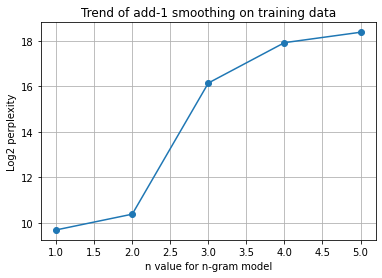

In [246]:
# plot the data 
plt.plot(plotx, ploty, marker='o',color ='tab:blue') 
plt.title('Trend of add-1 smoothing on training data') 
plt.xlabel('n value for n-gram model')
plt.ylabel('Log2 perplexity')
plt.grid(True)
plt.show()

In [274]:
s=test_book
plotx=[]
ploty=[]
for n_val in range(1,6):
    v=log_perp1(n_val,s)
    print('Log2-perplexity for n =',n_val,'with add-1 smoothing is',v)
    plotx.append(n_val)
    ploty.append(v)

Log2-perplexity for n = 1 with add-1 smoothing is 9.624973962147365
Log2-perplexity for n = 2 with add-1 smoothing is 8.285671163168145
Log2-perplexity for n = 3 with add-1 smoothing is 9.982676532703668
Log2-perplexity for n = 4 with add-1 smoothing is 9.296837041067624
Log2-perplexity for n = 5 with add-1 smoothing is 8.953607757258775


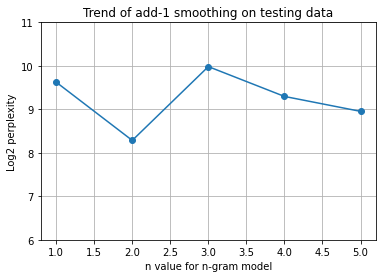

In [277]:
# plot the data 
plt.plot(plotx, ploty, marker='o',color ='tab:blue') 
plt.title('Trend of add-1 smoothing on testing data') 
plt.xlabel('n value for n-gram model')
plt.ylabel('Log2 perplexity')
plt.ylim([6, 11])
plt.grid(True)
plt.show()

### GOOD TURING

In [257]:
ngrams_total=[] #holds total number of n gram tuples per n
ngrams_freq=[]  #holds dictionary of frequency and count per n
for i in range (n_limit):
    d={}
    ngrams_freq.append(d)
for n in range (n_limit):
    sum=0
    for val in ngrams[n].values():
        # print(val,n)
        if val in ngrams_freq[n]:
            ngrams_freq[n][val]=ngrams_freq[n][val]+1
        else:
            ngrams_freq[n][val]=1
        sum+=val
    ngrams_total.append(sum)

In [258]:
# ngrams_total

In [259]:
# ngrams_freq[4]

In [260]:
def log_perp2(n,s):
    words=s.split()
    sum=0
    for i in range(len(words)):
        lis=[]
        for j in range(i,i-n,-1):
            if j>=0:
                lis.append(words[j])
        lis.reverse()
        sz=len(lis)
        if sz==1:
            tup=tuple(lis)
            if tup in ngrams[0]:
                freq=ngrams[0][tup]
                if freq+1 in ngrams_freq[0]:
                    ratio=(freq+1)*ngrams_freq[0][freq+1]/(ngrams_freq[0][freq]*ngrams_total[0])
                else:
                    ratio=(freq+1)/(ngrams_freq[0][freq]*ngrams_total[0])
            else:
                if 1 in ngrams_freq[0]:
                    ratio=ngrams_freq[0][1]/len(tokens)
                else :
                    ratio=1/len(tokens)
            sum+=math.log2(ratio)
        else:
            tup1=tuple(lis)
            lis=lis[:-1]
            tup2=tuple(lis)
            if tup1 in ngrams[sz-1]:
                freq=ngrams[sz-1][tup1]
                if freq+1 in ngrams_freq[sz-1]:
                    ratio=(freq+1)*ngrams_freq[sz-1][freq+1]/(ngrams_freq[sz-1][freq]*ngrams_total[sz-1])
                else:
                    ratio=(freq+1)/(ngrams_freq[sz-1][freq]*ngrams_total[sz-1])
            else:
                if 1 in ngrams_freq[sz-1]:
                    #causing low pp
                    ratio=ngrams_freq[sz-1][1]/ngrams_total[sz-1]
                    # ratio=(len(sentences)/len(tokens))*ngrams_freq[sz-1][1]/ngrams_total[sz-1]
                # if unknum+1 in ngrams_freq[sz-1]:
                #     ratio=ngrams_freq[sz-1][1+unknum]/ngrams_total[sz-1]
                else:
                    ratio=1/ngrams_total[sz-1]
            sum+=math.log2(ratio)
    return sum*(-1/len(words))

In [261]:
generate_sentence(5,10)

 the door and turned the key fumbling in their panic


In [262]:
#comparison over generated sentences
s='the door and turned the key fumbling in their panic'
n_val=5
print('Log2-perplexity without smoothing is',log_perp(n_val,s))
print('Log2-perplexity with good turing smoothing is',log_perp2(n_val,s))

Log2-perplexity without smoothing is 1.9812421762636143
Log2-perplexity with good turing smoothing is 18.961096391546445


In [278]:
s=train_book
plotx=[]
ploty=[]
for n_val in range(1,6):
    v=log_perp2(n_val,s)
    print('Log2-perplexity for n =',n_val,'with good turing smoothing is',v)
    plotx.append(n_val)
    ploty.append(v)

Log2-perplexity for n = 1 with good turing smoothing is 9.799544830957888
Log2-perplexity for n = 2 with good turing smoothing is 16.313882079917168
Log2-perplexity for n = 3 with good turing smoothing is 20.19463759448822
Log2-perplexity for n = 4 with good turing smoothing is 22.518577596490413
Log2-perplexity for n = 5 with good turing smoothing is 24.181559692257593


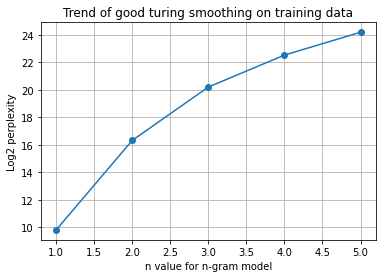

In [279]:
# plot the data 
plt.plot(plotx, ploty, marker='o',color ='tab:blue') 
plt.title('Trend of good turing smoothing on training data') 
plt.xlabel('n value for n-gram model')
plt.ylabel('Log2 perplexity')
plt.grid(True)
plt.show()

In [280]:
s=test_book
plotx=[]
ploty=[]
for n_val in range(1,6):
    v=log_perp2(n_val,s)
    print('Log2-perplexity for n =',n_val,'with good turing smoothing is',v)
    plotx.append(n_val)
    ploty.append(v)

Log2-perplexity for n = 1 with good turing smoothing is 9.699530164693511
Log2-perplexity for n = 2 with good turing smoothing is 12.02172488585613
Log2-perplexity for n = 3 with good turing smoothing is 6.9359015547532215
Log2-perplexity for n = 4 with good turing smoothing is 2.4575399367718527
Log2-perplexity for n = 5 with good turing smoothing is 0.7209077198811916


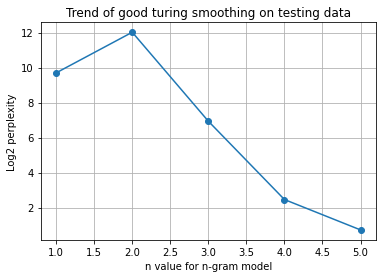

In [281]:
# plot the data 
plt.plot(plotx, ploty, marker='o',color ='tab:blue') 
plt.title('Trend of good turing smoothing on testing data') 
plt.xlabel('n value for n-gram model')
plt.ylabel('Log2 perplexity')
plt.grid(True)
plt.show()

### BACKOFF

In [282]:
def log_perp3(n,s):
    words=s.split()
    sum=0
    for i in range(len(words)):
        lis=[]
        for j in range(i,i-n,-1):
            if j>=0:
                lis.append(words[j])
        lis.reverse()
        sz=len(lis)
        
        if sz==1:
            tup=tuple(lis)
            if tup in ngrams[0]:
                ratio=ngrams[0][tup]/len(tokens)
            else :
                ratio=unknum/len(test_vocab)
            sum+=math.log2(ratio)
        else:
            tup1=tuple(lis)
            if tup1 in ngrams[sz-1]:
                lis=lis[:-1]
                tup2=tuple(lis)
                ratio=ngrams[sz-1][tup1]/ngrams[sz-2][tup2]
                sum+=math.log2(ratio)
            else :
                lis=lis[1:]
                snew=' '.join(lis)
                lenlis=len(lis)
                back=-1*log_perp3(n-1,snew)*(lenlis)
                # print(snew,back)
                sum+=back
                sum+=math.log2(0.4)
                
    return sum*(-1/len(words))

In [283]:
print(log_perp(1,'the'))
print(log_perp(1,'animagi'))
print(log_perp3(2,'animagi the'))
print(log_perp3(1,'the'))

4.4733372813656676
17.00506684057854
11.400166108415785
4.4733372813656676


In [284]:
# log_perp(2,'animagi the')

In [285]:
generate_sentence(5,10)

 the door and turned the key fumbling in their panic


In [286]:
#comparison over generated sentences
s='the door and turned the key fumbling in their panic'
n_val=5
print('Log2-perplexity without smoothing is',log_perp(n_val,s))
print('Log2-perplexity with backoff smoothing is',log_perp3(n_val,s))

Log2-perplexity without smoothing is 1.9812421762636143
Log2-perplexity with backoff smoothing is 1.9812421762636143


In [287]:
#comparison over generated sentences
s='the door and turned the key fumbling in their ministry'
n_val=5
# print('Log2-perplexity without smoothing is',log_perp(n_val,s))
print('Log2-perplexity with backoff smoothing is',log_perp3(n_val,s))

Log2-perplexity with backoff smoothing is 7.710051297553377


In [290]:
s=train_book
plotx=[]
ploty=[]
for n_val in range(1,6):
    v=log_perp3(n_val,s)
    print('Log2-perplexity for n =',n_val,'with backoff smoothing is',log_perp3(n_val,s))
    plotx.append(n_val)
    ploty.append(v)


Log2-perplexity for n = 1 with backoff smoothing is 9.679150772798046
Log2-perplexity for n = 2 with backoff smoothing is 6.192297380408703
Log2-perplexity for n = 3 with backoff smoothing is 3.031935574869996
Log2-perplexity for n = 4 with backoff smoothing is 1.4126249637650037
Log2-perplexity for n = 5 with backoff smoothing is 1.4983191185811309


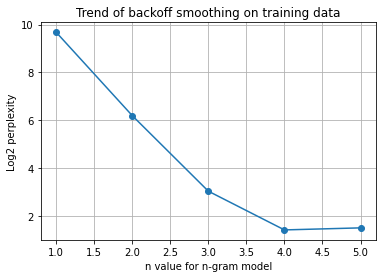

In [291]:
# plot the data 
plt.plot(plotx, ploty, marker='o',color ='tab:blue') 
plt.title('Trend of backoff smoothing on training data') 
plt.xlabel('n value for n-gram model')
plt.ylabel('Log2 perplexity')
plt.grid(True)
plt.show()

In [289]:
s=test_book
for n_val in range(1,6):
    print('Log2-perplexity for n =',n_val,'with backoff smoothing is',log_perp3(n_val,s))

Log2-perplexity for n = 1 with backoff smoothing is 9.520729817600651
Log2-perplexity for n = 2 with backoff smoothing is 7.828363791661742
Log2-perplexity for n = 3 with backoff smoothing is 14.651572280497628
Log2-perplexity for n = 4 with backoff smoothing is 31.570616782142732
Log2-perplexity for n = 5 with backoff smoothing is 64.36140439054165


### KNESSER-NEY

In [167]:
ngrams_unique_prefix=[]     # for each n gram model contains number of unique w_i-1 for each w_i as key
ngrams_unique_suffix=[]     # for each n gram model contains number of unique w_i for each w_i-1 as key
for i in range (n_limit):
    d={}
    ngrams_unique_prefix.append(d)
    ngrams_unique_suffix.append(d)
for n in range (1,n_limit):
    for key in ngrams[n]:
        lis=list(key)
        lastword=lis[-1]
        lis=tuple(lis[:-1])
        if lastword in ngrams_unique_prefix[n]:
            ngrams_unique_prefix[n][lastword]=ngrams_unique_prefix[n][lastword]+1
        else:
            ngrams_unique_prefix[n][lastword]=1
        if lis in ngrams_unique_suffix[n]:
            ngrams_unique_suffix[n][lis]=ngrams_unique_suffix[n][lis]+1
        else:
            ngrams_unique_suffix[n][lis]=1

In [168]:
def log_perp4(n,s):
    words=s.split()
    sum=0
    for i in range(len(words)):
        lis=[]
        for j in range(i,i-n,-1):
            if j>=0:
                lis.append(words[j])
        lis.reverse()
        sz=len(lis)
        # Absolute discounting
        if sz==1:
            tup=tuple(lis)
            if tup in ngrams[0]:
                ratio=(ngrams[0][tup]-0.75)/len(tokens)
            else :
                ratio = unknum/(len(tokens)+unknum)
            sum+=math.log2(ratio)
        else:
            tup1=tuple(lis)
            lis=lis[:-1]
            tup2=tuple(lis)

            # CONTINUATION PROBABILITY
            lastword=lis[-1]
            pcont_ratio=0
            if lastword in ngrams_unique_prefix[sz-1]:
                pcont_ratio=ngrams_unique_prefix[sz-1][lastword]/len(ngrams[sz-1])

            # LAMBDA
            if tup2 in ngrams_unique_suffix[sz-1]:
                lambdamult=0.75*ngrams_unique_suffix[sz-1][tup2]/ngrams[sz-2][tup2]
            else: 
                lambdamult=unknum/len(test_vocab)
            # lambdamult=1

            if tup1 in ngrams[sz-1]:
                ratio=(ngrams[sz-1][tup1]-0.75)/ngrams[sz-2][tup2]
                sum+=math.log2(ratio+lambdamult*pcont_ratio)
            else :
                ratio=unknum/(len(ngrams[sz-2])+unknum)
                sum+=math.log2(ratio+lambdamult*pcont_ratio)

    return sum*(-1/len(words))

In [169]:
generate_sentence(5,10)

 the door and turned the key fumbling in their panic


In [170]:
#comparison over generated sentences
s='the door'
n_val=5
print('Log2-perplexity without smoothing is',log_perp(n_val,s))
print('Log2-perplexity with KN is',log_perp4(n_val,s))

Log2-perplexity without smoothing is 5.21652169778244
Log2-perplexity with KN is 5.167221790623403


In [171]:
s=train_book
for n_val in range(1,6):
    print('Log2-perplexity for n =',n_val,'with KN smoothing is',log_perp4(n_val,s))

Log2-perplexity for n = 1 with KN smoothing is 9.713219375499346
Log2-perplexity for n = 2 with KN smoothing is 6.275399503207465
Log2-perplexity for n = 3 with KN smoothing is 3.933864069111434
Log2-perplexity for n = 4 with KN smoothing is 2.6434016018851323
Log2-perplexity for n = 5 with KN smoothing is 2.251630678031382


In [172]:
s=test_book
for n_val in range(1,6):
    print('Log2-perplexity for n =',n_val,'with KN smoothing is',log_perp4(n_val,s))

Log2-perplexity for n = 1 with KN smoothing is 9.660548655278905
Log2-perplexity for n = 2 with KN smoothing is 5.414342750097141
Log2-perplexity for n = 3 with KN smoothing is 5.832305461732503
Log2-perplexity for n = 4 with KN smoothing is 7.197241923187879
Log2-perplexity for n = 5 with KN smoothing is 7.9490690988822905


### INTERPOLATION

In [173]:
import cvxpy as cp
from cvxpy import *
import numpy as np

In [174]:
def log_perp5(n,s):
    words=s.split()
    sum=0
    for i in range(len(words)):
        lis=[]
        for j in range(i,i-n,-1):
            if j>=0:
                lis.append(words[j])
        lis.reverse()
        sz=len(lis)
        
        ratio_lis=[]
        while True:
            tup1=tuple(lis)
            if len(lis)==1:
                if tup1 in ngrams[0]:
                    ratio=ngrams[0][tup1]/len(tokens)
                else :
                    ratio = unknum/len(test_vocab)
                ratio_lis.append(ratio)
                break
            elif tup1 in ngrams[len(lis)-1]:
                lis2=lis[:-1]
                tup2=tuple(lis2)
                ratio=ngrams[len(lis)-1][tup1]/ngrams[len(lis)-2][tup2]
                ratio_lis.append(ratio)
            lis=lis[1:]
        ratio_lis.reverse()
        sz=len(ratio_lis)
        final_ratio=0
        for index in range(sz):
            final_ratio+=ratio_lis[index]*(1/sz)
        sum+=math.log2(final_ratio)
    return sum*(-1/len(words))

In [175]:
generate_sentence(5,10)

 the door and turned the key fumbling in their panic


In [176]:
s='the door and turned the key fumbling in their panic'
log_perp5(5,s)

2.916425467039723

In [177]:
s=train_book
for n_val in range(1,6):
    print('Log2-perplexity for n =',n_val,'with interpolation smoothing is',log_perp5(n_val,s))

Log2-perplexity for n = 1 with interpolation smoothing is 9.679150772798046
Log2-perplexity for n = 2 with interpolation smoothing is 6.851170787787341
Log2-perplexity for n = 3 with interpolation smoothing is 4.074644805700644
Log2-perplexity for n = 4 with interpolation smoothing is 2.2889426447929986
Log2-perplexity for n = 5 with interpolation smoothing is 1.5053071315002862


In [178]:
s=test_book
for n_val in range(1,6):
    print('Log2-perplexity for n =',n_val,'with interpolation smoothing is',log_perp5(n_val,s))

Log2-perplexity for n = 1 with interpolation smoothing is 9.520729817600651
Log2-perplexity for n = 2 with interpolation smoothing is 7.9239797247250845
Log2-perplexity for n = 3 with interpolation smoothing is 7.439143218166716
Log2-perplexity for n = 4 with interpolation smoothing is 7.328902125703149
Log2-perplexity for n = 5 with interpolation smoothing is 7.3104555157422615


#### DEV SET OPTIMIZATION 

In [192]:

def log_perp5conv(n,s):
    optszval=5
    optlis=[]
    for i in range(optszval):
        optlis.append(1)
    A=np.array(optlis)
    words=s.split()
    sum=0
    for i in range(len(words)):
        lis=[]
        for j in range(i,i-n,-1):
            if j>=0:
                lis.append(words[j])
        lis.reverse()
        sz=len(lis)
        
        ratio_lis=[]
        while True:
            tup1=tuple(lis)
            if len(lis)==1:
                if tup1 in ngrams[0]:
                    ratio=ngrams[0][tup1]/len(tokens)
                else :
                    ratio = unknum/len(test_vocab)
                ratio_lis.append(ratio)
                break
            elif tup1 in ngrams[len(lis)-1]:
                lis2=lis[:-1]
                tup2=tuple(lis2)
                ratio=ngrams[len(lis)-1][tup1]/ngrams[len(lis)-2][tup2]
                ratio_lis.append(ratio)
            lis=lis[1:]
        ratio_lis.reverse()
        insz=len(ratio_lis)
        while len(ratio_lis)<5:
            ratio_lis.append(1)
        # if insz==5:
        nom=np.array(ratio_lis[:optszval])
        A=np.vstack((A,nom)) 

        sz=len(ratio_lis)
        final_ratio=0
        for index in range(sz):
            final_ratio+=ratio_lis[index]*(1/sz)
        sum+=math.log2(final_ratio)
    # print(A.shape)
    return A

In [181]:
s=test_book
n_val=5
A=log_perp5conv(n_val,s)
A = np.delete(A, 0, 0)
print(A.shape)

(203935, 5)


In [183]:
A[:20]

array([[1.20349896e-02, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
        1.00000000e+00],
       [4.50185287e-02, 3.60978251e-04, 1.00000000e+00, 1.00000000e+00,
        1.00000000e+00],
       [9.07973221e-04, 1.25934861e-02, 2.50000000e-01, 1.00000000e+00,
        1.00000000e+00],
       [3.20397249e-04, 1.49521531e-01, 2.35632184e-01, 1.00000000e+00,
        1.00000000e+00],
       [1.08609237e-06, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
        1.00000000e+00],
       [4.50185287e-02, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
        1.00000000e+00],
       [9.00370575e-04, 1.83353438e-03, 1.00000000e+00, 1.00000000e+00,
        1.00000000e+00],
       [4.01854177e-05, 3.61881785e-03, 1.31578947e-02, 1.00000000e+00,
        1.00000000e+00],
       [2.59576076e-04, 1.00000000e+00, 1.00000000e+00, 1.00000000e+00,
        1.00000000e+00],
       [3.95446232e-03, 5.85774059e-02, 1.00000000e+00, 1.00000000e+00,
        1.00000000e+00],
       [1.91619277e-02, 4.3422

In [203]:
# x = cp.Variable(A.shape[1])
# objective = cp.Maximize(cp.sum_squares(A @ x ))
# constraints = [0<= x, x <= 1, cp.sum(x) == 1]
# prob = cp.Problem(objective, constraints)

In [205]:
x = cp.Variable(A.shape[1])
objective = cp.Maximize(cp.sum(A @ x ))
constraints = [0<= x, x <= 1, cp.sum(x) == 1]
prob = cp.Problem(objective, constraints)

In [206]:
result = prob.solve()
print(result)

201721.9000734221


In [186]:
# The optimal value for x is stored in `x.value`.
print(x.value)

[2.16848464e-13 3.04011103e-11 5.44029660e-11 1.24025898e-09
 9.99999999e-01]


In [208]:
inter=30
ssqdict={}
x=np.zeros(5)
for a in range(inter):
    for b in range(inter):
        for c in range(inter):
            for d in range(inter):
                x[0]=a/inter
                x[1]=b/inter
                x[2]=c/inter
                x[3]=d/inter
                x[4]=1-(a+b+c+d)/inter
                if x[4]>1 or x[4]<0:
                    continue

                ssq=np.linalg.norm(np.matmul(A,x))
                toop=tuple(x.tolist())
                ssqdict[toop]=ssq
ssqdict=dict(sorted(ssqdict.items(), key=lambda item: -item[1]))


In [209]:
ssqdict

{(0.0, 0.0, 0.0, 0.0, 1.0): 448.5100063445192,
 (0.0, 0.0, 0.0, 0.03333333333333333, 0.9666666666666667): 447.76103242277634,
 (0.0, 0.0, 0.0, 0.06666666666666667, 0.9333333333333333): 447.0312300076317,
 (0.0, 0.0, 0.0, 0.1, 0.9): 446.320693144108,
 (0.0, 0.0, 0.0, 0.13333333333333333, 0.8666666666666667): 445.62951398646567,
 (0.0, 0.0, 0.0, 0.16666666666666666, 0.8333333333333334): 444.9577827431113,
 (0.0, 0.0, 0.03333333333333333, 0.0, 0.9666666666666667): 444.60750522776624,
 (0.0, 0.0, 0.0, 0.2, 0.8): 444.30558762207033,
 (0.0,
  0.0,
  0.03333333333333333,
  0.03333333333333333,
  0.9333333333333333): 443.8742648269185,
 (0.0, 0.0, 0.0, 0.23333333333333334, 0.7666666666666666): 443.67301477709515,
 (0.0, 0.0, 0.03333333333333333, 0.06666666666666667, 0.9): 443.16041602008187,
 (0.0, 0.0, 0.0, 0.26666666666666666, 0.7333333333333334): 443.0601482544727,
 (0.0, 0.0, 0.0, 0.3, 0.7): 442.4670699406111,
 (0.0, 0.0, 0.03333333333333333, 0.1, 0.8666666666666667): 442.46605266305164,
 

# PERFORMANCE ON DEV SET

In [191]:
for n in range(1,n_limit+1):
    n_val=n
    print('nval is ',n)
    print('Log2-perplexity by add-1 is',log_perp1(n_val,test_book))
    print('Log2-perplexity by GT is',log_perp2(n_val,test_book))
    print('Log2-perplexity by backoff is',log_perp3(n_val,test_book))
    print('Log2-perplexity by KN is',log_perp4(n_val,test_book))
    print('Log2-perplexity by interpolation is',log_perp5(n_val,test_book))
    # print('')

nval is  1
Log2-perplexity by add-1 is 9.624973962147365
Log2-perplexity by GT is 9.699530164693511
Log2-perplexity by backoff is 9.520729817600651
Log2-perplexity by KN is 9.660548655278905
Log2-perplexity by interpolation is 9.520729817600651
nval is  2
Log2-perplexity by add-1 is 8.285671163168145
Log2-perplexity by GT is 12.02172488585613
Log2-perplexity by backoff is 7.828363791661742
Log2-perplexity by KN is 5.414342750097141
Log2-perplexity by interpolation is 7.9239797247250845
nval is  3
Log2-perplexity by add-1 is 9.982676532703668
Log2-perplexity by GT is 6.9359015547532215
Log2-perplexity by backoff is 14.651572280497628
Log2-perplexity by KN is 5.832305461732503
Log2-perplexity by interpolation is 7.439143218166716
nval is  4
Log2-perplexity by add-1 is 9.296837041067624
Log2-perplexity by GT is 2.4575399367718527
Log2-perplexity by backoff is 31.570616782142732
Log2-perplexity by KN is 7.197241923187879
Log2-perplexity by interpolation is 7.328902125703149
nval is  5
Log2